In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 7,7

# Ways to Generate Random Planar Graphs

In [6]:
# I now how to generate random points, but how to decide which two are "connected"?

# why only two?

In [13]:
from scipy.spatial import Voronoi

In [50]:
pt = np.random.random((10,2))

In [51]:
x = sp.spatial.Voronoi(pt)

In [52]:
x.vertices

array([[ 0.15146553,  1.05894634],
       [ 0.63202472,  0.41748959],
       [ 0.05377139,  0.64866923],
       [ 0.240545  ,  0.55629071],
       [ 0.15443941,  1.05113837],
       [ 0.25428197,  0.57024364],
       [ 0.38414435,  0.6119965 ],
       [ 0.35270402,  0.76465851],
       [ 0.56501366,  0.49209977],
       [ 0.43977027,  0.60929383],
       [ 0.66804608,  0.98615225],
       [ 0.56907543,  0.8468299 ]])

In [53]:
x.regions

[[3, -1, 2],
 [],
 [-1, 1],
 [2, 0, -1],
 [5, 3, 2, 0, 4],
 [7, 4, 5, 6],
 [11, 9, 8, 10],
 [10, -1, 1, 8],
 [9, 6, 5, 3, -1, 1, 8],
 [11, 7, 6, 9],
 [11, 7, 4, 0, -1, 10]]

In [54]:
x.ridge_vertices

[[-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 1],
 [-1, 1],
 [-1, 0],
 [0, 2],
 [0, 4],
 [3, 5],
 [4, 5],
 [4, 7],
 [5, 6],
 [6, 7],
 [8, 10],
 [8, 9],
 [9, 11],
 [10, 11],
 [1, 8],
 [-1, 10],
 [6, 9],
 [7, 11]]

In [55]:
x.ridge_points

array([[8, 1],
       [8, 0],
       [8, 4],
       [7, 9],
       [7, 1],
       [0, 3],
       [0, 4],
       [4, 3],
       [4, 1],
       [4, 2],
       [2, 3],
       [2, 1],
       [2, 6],
       [5, 9],
       [5, 1],
       [5, 6],
       [5, 3],
       [9, 1],
       [9, 3],
       [1, 6],
       [6, 3]], dtype=int32)

# How to use SciPy's Voronoi Algorithm

at this point we are like driving a car.  insert the case, press the gas and it runs!

do we have any idea what is going on inside?  NO

The algorithm is based on quality C code called [Qhull](http://www.qhull.org/) and mainly we need to interpret the points we just generated in Qhull's `voronoi` object.

Voronoi incidentally was a **number theorist** but we are not there yet.

In [60]:
pt = np.random.random((10,2))
x = sp.spatial.Voronoi(pt)

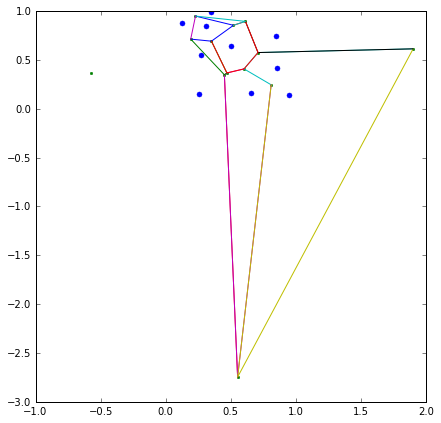

In [64]:
# trial an error to figure out the type structure of [x]

plt.plot(pt[:,0], pt[:,1], '.', markersize=10)

plt.plot(x.vertices[:,0], x.vertices[:,1], '.', markersize=5)

# how to iterate through the x.regions object?
for poly in x.regions:
    z = np.array([ x.vertices[k] for k in poly if k >  0])
    #print z
    if z.shape[0] > 0:
        plt.plot( z[:,0], z[:,1])

#plt.xlim([0,2])
#plt.ylim([0,2])

# Google It

responses like these, basically equivalent to "i don't know", suggest we write our own implementation